# Titanic Classification with Logistic Regression
### Ernesto Gonzales, MSDA

In [1]:
#Importing Libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
#Loading Dataset (Titanic) from Seaborn

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#Data Cleansing

#Keeping relevant features

features = ["sex", "age", "fare", "class", "embarked"]
X = df[features]
y = df["survived"]

#Dropping rows with missing values using Drop NA

X = X.dropna()
y = y.loc[X.index]

In [8]:
#Spliting  Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Preprocessing + Modeling

num_features = ["age", "fare"]
cat_features = ["sex", "class", "embarked"]

#Transformers

num_transformer = Pipeline(steps=[("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

#Column Transformer

preprocessor = ColumnTransformer(transformers =[("num", num_transformer, num_features),
                                                ("cat", cat_transformer, cat_features)])

#Logistic Regression Pipeline

clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
#Predictions + Metrics

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = pd.DataFrame({"Metric": ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
                        "Score": [acc, prec, rec, f1, roc]})
results


,Metric,Score
0,Accuracy,0.797203
1,Precision,0.869565
2,Recall,0.634921
3,F1,0.733945
4,ROC-AUC,0.817659


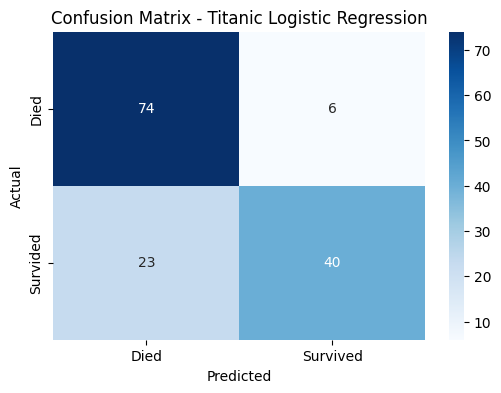

In [12]:
#Confusion Matrix Plot

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survided"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Logistic Regression")
plt.show()



In [17]:
#Exporting Results to MD and saving plot
!pip install tabulate #installing tabulate

results.to_markdown("../docs/titanic_results.md", index=False)
plt.savefig("../docs/titanic_confusion.png", dpi=150)

<Figure size 640x480 with 0 Axes>